In [1]:
import sys
import os
path_helper = ["c:\\","Users","vfriedrich","projects","gating","reproducibility_cleaned","helper"]
sys.path.append(os.path.join(*path_helper))
import helper_reproducibility as hr
import convexgating as cg
import scanpy as sc
import anndata as ann
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sns
import os
import re
from pywget import wget
print(sys.executable)

C:\Users\vfriedrich\Anaconda3\envs\gating_env_local_parameter_option\python.exe


In [2]:
#branch add_parameter_option

In [3]:
pre = 'P04_summary'
start_time = hr.get_time()

In [4]:
path_input_data = hr.return_input_data_path() 
path_output_data = hr.return_output_data_path()
path_output_script = os.path.join(path_output_data,pre)
hr.make_path(os.path.join(path_output_script))
path_gating_hull =  'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility_cleaned\\supp_Figure_oetjen'

In [5]:
samples = ['A','B','C','H','J','O','T','U'] 
cluster_lvl2 = ['cluster_T cell','cluster_NK cell']
cluster_lvl3 = ['cluster_CD4+ T cell','cluster_CD8+ T cell','cluster_Double negative T cell','cluster_Double positive T cell',
 'cluster_NK cell']
cluster_lvl4 = ['cluster_CCR7- CD4+ T cell',
 'cluster_CCR7+ CD4+ T cell',
 'cluster_CCR7- CD8+ T cell',
 'cluster_CCR7+ CD8+ T cell',
'cluster_Double negative T cell',
'cluster_Double positive T cell',
'cluster_NK cell']


cluster_lvl5 = ['cluster_CD4+ CM T cell','cluster_CD4+ TEMRA','cluster_CD8+ CM T cell','cluster_CD8+ TE T cell','cluster_Double negative T cell','cluster_NK cell','cluster_Naive CD8+ T cell',
'cluster_CD4+ EM T cell','cluster_CD4+ TRM T cell','cluster_CD8+ EM T cell','cluster_CD8+ TRM T cell','cluster_Double positive T cell','cluster_Naive CD4+ T cell']

In [6]:
gating_dir_lvl2 = os.path.join(path_gating_hull,'P02_cell_type_lvl2_hull')
overview_lvl2 = pd.DataFrame(columns =['sample','cluster','f1','recall','precision','hierarchy'])
for sample in samples:
    for cluster in cluster_lvl2:
        perf_loc = os.path.join(gating_dir_lvl2,sample,cluster,'performance.csv')
        f1,recall,precision,hierarchy = hr.get_f1_hierarch(perf_loc)
        overview_lvl2 = overview_lvl2.append(pd.DataFrame([[sample,cluster,f1,recall,precision,hierarchy]],columns=['sample','cluster','f1','recall','precision','hierarchy']))
overview_lvl2['level'] = 'lvl2'
    

gating_dir_lvl3 = os.path.join(path_gating_hull,'P02_cell_type_lvl3_hull') 
overview_lvl3 = pd.DataFrame(columns =['sample','cluster','f1','recall','precision','hierarchy'])
for sample in samples:
    for cluster in cluster_lvl3:
        perf_loc = os.path.join(gating_dir_lvl3,sample,cluster,'performance.csv')
        f1,recall,precision,hierarchy = hr.get_f1_hierarch(perf_loc)
        overview_lvl3 = overview_lvl3.append(pd.DataFrame([[sample,cluster,f1,recall,precision,hierarchy]],columns=['sample','cluster','f1','recall','precision','hierarchy']))
overview_lvl3['level'] = 'lvl3'

gating_dir_lvl4 = os.path.join(path_gating_hull,'P02_cell_type_lvl4_hull') 
overview_lvl4 = pd.DataFrame(columns =['sample','cluster','f1','recall','precision','hierarchy'])
for sample in samples:
    for cluster in cluster_lvl4:
        perf_loc = os.path.join(gating_dir_lvl4,sample,cluster,'performance.csv')
        f1,recall,precision,hierarchy = hr.get_f1_hierarch(perf_loc)
        overview_lvl4 = overview_lvl4.append(pd.DataFrame([[sample,cluster,f1,recall,precision,hierarchy]],columns=['sample','cluster','f1','recall','precision','hierarchy']))
overview_lvl4['level'] = 'lvl4'

gating_dir_lvl5 = os.path.join(path_gating_hull,'P02_cell_type_lvl5_hull') 
overview_lvl5 = pd.DataFrame(columns =['sample','cluster','f1','recall','precision','hierarchy'])
for sample in samples:
    for cluster in cluster_lvl5:
        perf_loc = os.path.join(gating_dir_lvl5,sample,cluster,'performance.csv')
        f1,recall,precision,hierarchy = hr.get_f1_hierarch(perf_loc)
        overview_lvl5 = overview_lvl5.append(pd.DataFrame([[sample,cluster,f1,recall,precision,hierarchy]],columns=['sample','cluster','f1','recall','precision','hierarchy']))
overview_lvl5['level'] = 'lvl5'

# level 2

In [7]:
#save before plotting
overview_lvl2.to_csv(os.path.join(path_output_script,pre + '_overview_lvl2.csv'))

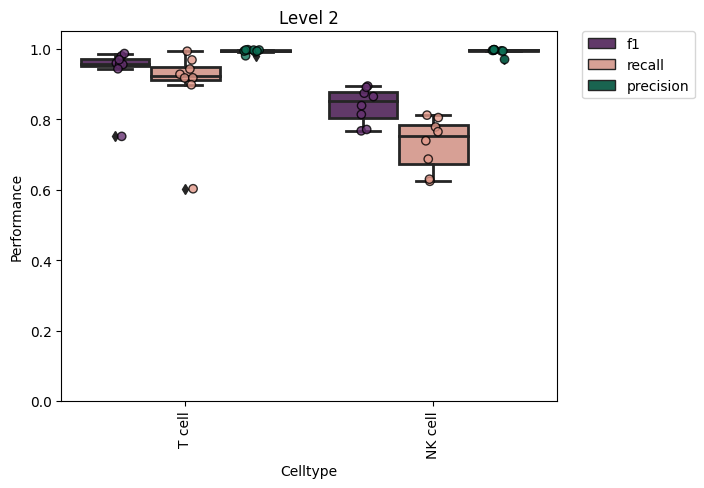

In [8]:
overview_lvl2['celltype_compact'] =  list(overview_lvl2['cluster'].apply(lambda x: x.split('_')[1]))

melted_lvl2 = pd.melt(overview_lvl2[['f1','recall','precision','celltype_compact']],id_vars=['celltype_compact'])
melted_lvl2.rename(columns = {'value':'score', 'variable':'metric'}, inplace = True)

colors={"recall": "#e2998a","f1": "#663171","precision":"#0c7156"}

ax =sns.boxplot(x="celltype_compact",y="score",hue="metric",data = melted_lvl2,palette = colors,linewidth = 2,width = 0.85)
sns.stripplot(x="celltype_compact",y="score", dodge=True,hue="metric",data = melted_lvl2,size = 6,edgecolor = 'black',linewidth= 1,
              jitter = True,alpha =0.8,palette = colors)
plt.ylim([0,1.05])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Celltype')
plt.ylabel('Performance')
plt.xticks(rotation=90,fontsize = 10)
# Add a title
plt.title('Level 2')
plt.savefig(os.path.join(path_output_script,pre + '_celltype_scores_lvl2.pdf'),bbox_inches='tight')
plt.show()
plt.close()


# level 3

In [9]:
#save before plotting
overview_lvl3.to_csv(os.path.join(path_output_script,pre + '_overview_lvl3.csv'))

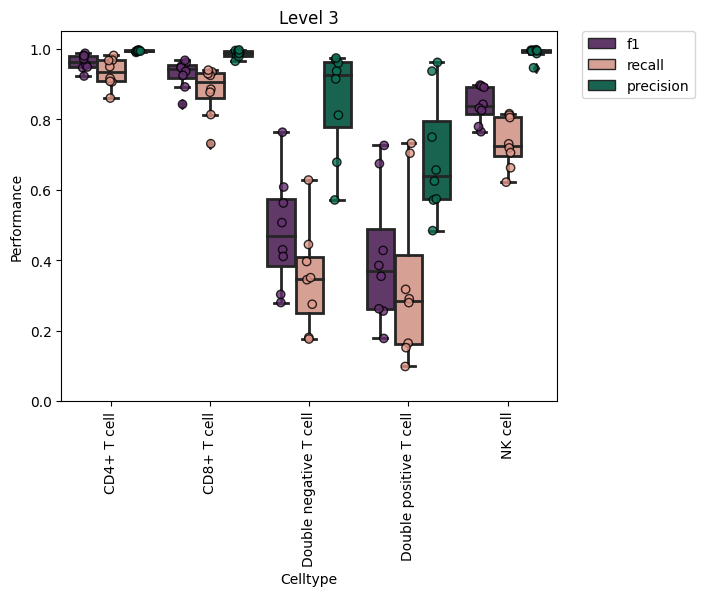

In [10]:
overview_lvl3['celltype_compact'] =  list(overview_lvl3['cluster'].apply(lambda x: x.split('_')[1]))

melted_lvl3 = pd.melt(overview_lvl3[['f1','recall','precision','celltype_compact']],id_vars=['celltype_compact'])
melted_lvl3.rename(columns = {'value':'score', 'variable':'metric'}, inplace = True)

colors={"recall": "#e2998a","f1": "#663171","precision":"#0c7156"}

ax =sns.boxplot(x="celltype_compact",y="score",hue="metric",data = melted_lvl3,palette = colors,linewidth = 2,width = 0.85)
sns.stripplot(x="celltype_compact",y="score", dodge=True,hue="metric",data = melted_lvl3,size = 6,edgecolor = 'black',linewidth= 1,
              jitter = True,alpha =0.8,palette = colors)
plt.ylim([0,1.05])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Celltype')
plt.ylabel('Performance')
plt.xticks(rotation=90,fontsize = 10)
# Add a title
plt.title('Level 3')
plt.savefig(os.path.join(path_output_script,pre + '_celltype_scores_lvl3.pdf'),bbox_inches='tight')
plt.show()
plt.close()

# level 4

In [11]:
#save before plotting
overview_lvl4.to_csv(os.path.join(path_output_script,pre + '_overview_lvl4.csv'))

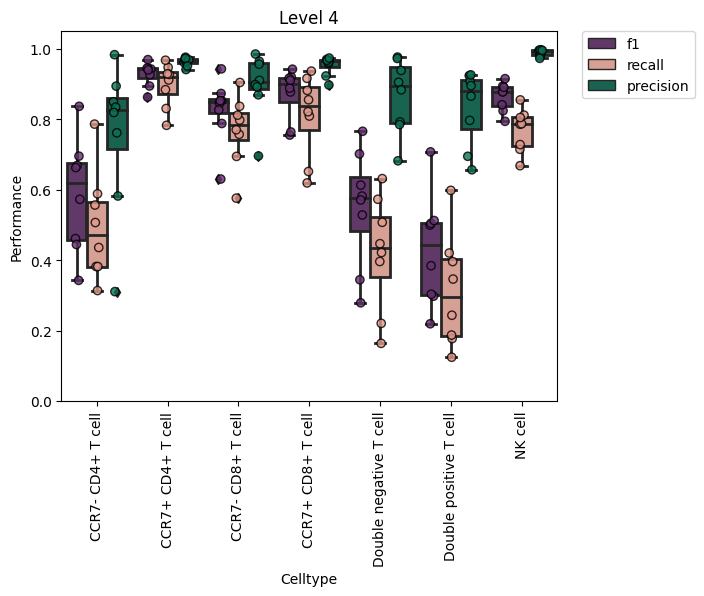

In [12]:
overview_lvl4['celltype_compact'] =  list(overview_lvl4['cluster'].apply(lambda x: x.split('_')[1]))

melted_lvl4 = pd.melt(overview_lvl4[['f1','recall','precision','celltype_compact']],id_vars=['celltype_compact'])
melted_lvl4.rename(columns = {'value':'score', 'variable':'metric'}, inplace = True)

colors={"recall": "#e2998a","f1": "#663171","precision":"#0c7156"}

ax =sns.boxplot(x="celltype_compact",y="score",hue="metric",data = melted_lvl4,palette = colors,linewidth = 2,width = 0.85)
sns.stripplot(x="celltype_compact",y="score", dodge=True,hue="metric",data = melted_lvl4,size = 6,edgecolor = 'black',linewidth= 1,
              jitter = True,alpha =0.8,palette = colors)
plt.ylim([0,1.05])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Celltype')
plt.ylabel('Performance')
plt.xticks(rotation=90,fontsize = 10)
# Add a title
plt.title('Level 4')
plt.savefig(os.path.join(path_output_script,pre + '_celltype_scores_lvl4.pdf'),bbox_inches='tight')
plt.show()
plt.close()

# level 5

In [13]:
#save before plotting
overview_lvl5.to_csv(os.path.join(path_output_script,pre + '_overview_lvl5.csv'))

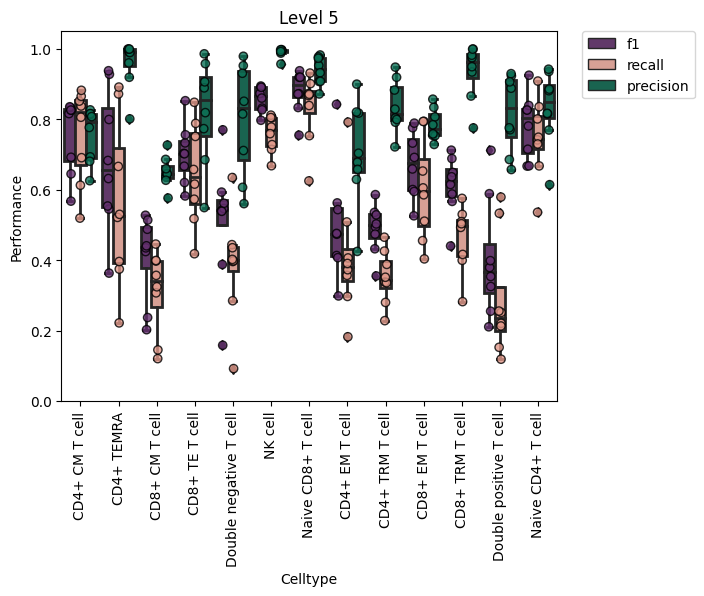

In [14]:
overview_lvl5['celltype_compact'] =  list(overview_lvl5['cluster'].apply(lambda x: x.split('_')[1]))

melted_lvl5 = pd.melt(overview_lvl5[['f1','recall','precision','celltype_compact']],id_vars=['celltype_compact'])
melted_lvl5.rename(columns = {'value':'score', 'variable':'metric'}, inplace = True)

colors={"recall": "#e2998a","f1": "#663171","precision":"#0c7156"}

ax =sns.boxplot(x="celltype_compact",y="score",hue="metric",data = melted_lvl5,palette = colors,linewidth = 2,width = 0.85)
sns.stripplot(x="celltype_compact",y="score", dodge=True,hue="metric",data = melted_lvl5,size = 6,edgecolor = 'black',linewidth= 1,
              jitter = True,alpha =0.8,palette = colors)
plt.ylim([0,1.05])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Celltype')
plt.ylabel('Performance')
plt.xticks(rotation=90,fontsize = 10)
# Add a title
plt.title('Level 5')
plt.savefig(os.path.join(path_output_script,pre + '_celltype_scores_lvl5.pdf'),bbox_inches='tight')
plt.show()
plt.close()

## Save session

In [15]:
hr.save_package_versions(hr.return_base_package_version_path(),pre = pre,do_print = True)
sc.logging.print_versions()
end_time = hr.get_time()
hr.get_time_delta(start_time,end_time,pre=pre,save=True)

babel==2.13.1
qtpy==2.4.1
sqlalchemy==2.0.23
send2trash==1.8.2
anyio==4.1.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
async-lru==2.0.4
attrs==23.1.0
beautifulsoup4==4.12.2
bleach==6.1.0
certifi==2023.11.17
cffi==1.16.0
charset-normalizer==3.3.2
colorama==0.4.6
comm==0.2.0
debugpy==1.8.0
decorator==5.1.1
defusedxml==0.7.1
exceptiongroup==1.2.0
executing==2.0.1
fastjsonschema==2.19.0
fqdn==1.5.1
greenlet==3.0.1
idna==3.6
importlib-metadata==7.0.0
ipykernel==6.27.1
ipython==8.18.1
ipython-genutils==0.2.0
ipython-sql==0.5.0
ipywidgets==8.1.1
isoduration==20.11.0
jedi==0.19.1
json5==0.9.14
jsonpointer==2.4
jsonschema==4.20.0
jsonschema-specifications==2023.11.2
jupyter==1.0.0
jupyter-client==8.6.0
jupyter-console==6.6.3
jupyter-core==5.5.0
jupyter-events==0.9.0
jupyter-lsp==2.2.1
jupyter-server==2.11.2
jupyter-server-terminals==0.4.4
jupyterlab==4.0.9
jupyterlab-pygments==0.3.0
jupyterlab-server==2.25.2
jupyterlab-widgets==3.0.9
matplotlib-inline==0.1.6


datetime.timedelta(seconds=12, microseconds=399085)